In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("../reuters_lowresource_noedgeweights.csv")
df

,Unnamed: 0,test_name,acc,ductive,seed,unlabeled_amount,labeled_amount
0,0,2 layer default GCN weighted,0.875000,trans,0,40,400
1,1,2 layer default GCN weighted,0.825000,in,0,40,400
2,2,2 layer default GCN weighted,0.900000,trans,0,100,400
3,3,2 layer default GCN weighted,0.840000,in,0,100,400
4,4,2 layer default GCN weighted,0.865000,trans,0,200,400
...,...,...,...,...,...,...,...
106,106,2 layer default GCN weighted,0.870000,trans,7,400,400
107,107,2 layer default GCN weighted,0.850000,in,7,400,400
108,108,2 layer default GCN weighted,0.868333,trans,7,600,400
109,109,2 layer default GCN weighted,0.826667,in,7,600,400


In [93]:
# remove unfinished seeds
seed_lim = 6
df = df[df["seed"]<=seed_lim]

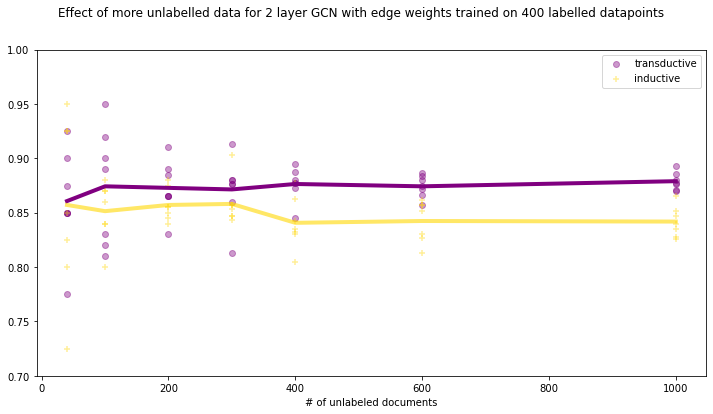

In [94]:
fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 400 labelled datapoints")

sub = df[(df["ductive"]=="trans")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="purple", label="transductive", alpha=0.4)
sub = df[(df["ductive"]=="in")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="gold", label="inductive", marker="+", alpha=0.4)

ax.set_ylim(0.7, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["ductive"]=="in")]["acc"].mean())
    mean_transductives.append(sub_df[(sub_df["ductive"]=="trans")]["acc"].mean())

ax.plot(xs, mean_transductives, color="purple", linewidth=4)
ax.plot(xs, mean_inductives, color="gold", alpha=0.6, linewidth=4)

ax.set_xlabel("# of unlabeled documents")

plt.legend()
plt.show()